In [2]:
#Importar Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [42]:
#Importar el Dataset

dataset = np.load("/Users/diegoalvarez/Documents/Maestria/Python/Proyecto/proyecto_training_data.npy")

In [31]:
SP = dataset[:, 0]
OQ = dataset[:, 1]
FFSF = dataset[:, 2]
TRAG = dataset[:, 3]
YB = dataset[:, 4]
LF = dataset[:, 5]
print(SP)
print(OQ)
print(FFSF)
print(TRAG)
print(YB)
print(LF)

[208500. 181500. 223500. ... 266500. 142125. 147500.]
[7. 6. 7. ... 7. 5. 5.]
[ 856. 1262.  920. ... 1188. 1078. 1256.]
[8. 6. 6. ... 9. 5. 6.]
[2003. 1976. 2001. ... 1941. 1950. 1965.]
[65. 80. 68. ... 66. 68. 75.]


In [33]:
dframe = {'SP': (SP),
                 'OQ': (OQ),
                 'FFSF': (FFSF),
                 'TRAG': (TRAG),
                 'YB': (YB),
                 'LF': (LF)
            }
df = pd.DataFrame(dframe)
df     

,SP,OQ,FFSF,TRAG,YB,LF
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [35]:
#Revisión de datos NaN
porcentaje_nan_s = (df['SP'].isna().sum() / len(df['SP'])) * 100
porcentaje_nan_o = (df['OQ'].isna().sum() / len(df['OQ'])) * 100
porcentaje_nan_f = (df['FFSF'].isna().sum() / len(df['FFSF'])) * 100
porcentaje_nan_t = (df['TRAG'].isna().sum() / len(df['TRAG'])) * 100
porcentaje_nan_y = (df['YB'].isna().sum() / len(df['YB'])) * 100
porcentaje_nan_l = (df['LF'].isna().sum() / len(df['LF'])) * 100
print(f'El porcentaje de valores NaN en la variable SalePrice es: {porcentaje_nan_s:.2f}%')
print(f'El porcentaje de valores NaN en la variable OverallQual es: {porcentaje_nan_o:.2f}%')
print(f'El porcentaje de valores NaN en la variable FstFlrSF es: {porcentaje_nan_f:.2f}%')
print(f'El porcentaje de valores NaN en la variable TotRmsAbvGrd es: {porcentaje_nan_t:.2f}%')
print(f'El porcentaje de valores NaN en la variable YearBuilt es: {porcentaje_nan_y:.2f}%')
print(f'El porcentaje de valores NaN en la variable LotFrontage es: {porcentaje_nan_l:.2f}%')

El porcentaje de valores NaN en la variable SalePrice es: 0.00%
El porcentaje de valores NaN en la variable OverallQual es: 0.00%
El porcentaje de valores NaN en la variable FstFlrSF es: 0.00%
El porcentaje de valores NaN en la variable TotRmsAbvGrd es: 0.00%
El porcentaje de valores NaN en la variable YearBuilt es: 0.00%
El porcentaje de valores NaN en la variable LotFrontage es: 17.74%


In [44]:
#Debido que la columna LF posee mas del 10% de datos NaN, como buena practica se procedera a eliminarla

col_elim = 5
dataset_v2 = np.delete(dataset, col_elim, axis=1)
dataset_v2

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03]])

In [45]:
tamano_total = len(dataset_v2)
porcentaje_entrenamiento = 0.8

#Calcular el índice para dividir datos
indice_div = int(tamano_total * porcentaje_entrenamiento)

#Dividir los datos en conjunto de entrenamiento y testing
datos_entren = dataset_v2[:indice_div, :]
datos_val = dataset_v2[indice_div:, :]

In [46]:
print("Dimensiones del conjunto de entrenamiento:", datos_entren.shape)
print("Dimensiones del conjunto de validación/pruebas:", datos_val.shape)

Dimensiones del conjunto de entrenamiento: (1168, 5)
Dimensiones del conjunto de validación/pruebas: (292, 5)


In [48]:
SalePrice = datos_entren[:, 0]
OverallQual = datos_entren[:, 1]
FstFlrSF = datos_entren[:, 2]
TotRmsAbvGrd = datos_entren[:, 3]
YearBuilt = datos_entren[:, 4]
print(SalePrice)
print(OverallQual)
print(FstFlrSF)
print(TotRmsAbvGrd)
print(YearBuilt)

[208500. 181500. 223500. ... 233170. 245350. 173000.]
[7. 6. 7. ... 7. 8. 6.]
[ 856. 1262.  920. ... 1502. 1694.  959.]
[8. 6. 6. ... 7. 7. 7.]
[2003. 1976. 2001. ... 2009. 2008. 2000.]


In [50]:
dataframe = {'SalePrice': (SalePrice),
                 'OverallQual': (OverallQual),
                 'FstFlrSF': (FstFlrSF),
                 'TotRmsAbvGrd': (TotRmsAbvGrd),
                 'YearBuilt': (YearBuilt),
            }
df1 = pd.DataFrame(dataframe)
df1            

,SalePrice,OverallQual,FstFlrSF,TotRmsAbvGrd,YearBuilt
0,208500.0,7.0,856.0,8.0,2003.0
1,181500.0,6.0,1262.0,6.0,1976.0
2,223500.0,7.0,920.0,6.0,2001.0
3,140000.0,7.0,961.0,7.0,1915.0
4,250000.0,8.0,1145.0,9.0,2000.0
...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0
1164,194000.0,5.0,1432.0,5.0,1978.0
1165,233170.0,7.0,1502.0,7.0,2009.0
1166,245350.0,8.0,1694.0,7.0,2008.0


In [52]:
#Análisis Exploratorio de datos

sm = np.mean(SalePrice)
smx = np.max(SalePrice)
smn = np.min(SalePrice)
sp = np.ptp(SalePrice)
sd = np.std(SalePrice)
print('SalePrice:','\n''Media:', sm,'\n''Máximo:', smx,'\n''Mínimo:', smn,'\n''Rango:', sp,'\n''Desviación:', sd)
print('--------------------------')
print()
om = np.mean(OverallQual)
omx = np.max(OverallQual)
omn = np.min(OverallQual)
op = np.ptp(OverallQual)
od = np.std(OverallQual)
print('OverallQual:','\n''Media:', om,'\n''Máximo:', omx,'\n''Mínimo:', omn,'\n''Rango:', op,'\n''Desviación:', od)
print('--------------------------')
print()
fm = np.mean(FstFlrSF)
fmx = np.max(FstFlrSF)
fmn = np.min(FstFlrSF)
fp = np.ptp(FstFlrSF)
fd = np.std(FstFlrSF)
print('FstFlrSF:','\n''Media:', fm,'\n''Máximo:', fmx,'\n''Mínimo:', fmn,'\n''Rango:', fp,'\n''Desviación:', fd)
print('--------------------------')
print()
tm = np.mean(TotRmsAbvGrd)
tmx = np.max(TotRmsAbvGrd)
tmn = np.min(TotRmsAbvGrd)
tp = np.ptp(TotRmsAbvGrd)
td = np.std(TotRmsAbvGrd)
print('TotRmsAbvGrd','\n''Media:', tm,'\n''Máximo:', tmx,'\n''Mínimo:', tmn,'\n''Rango:', tp,'\n''Desviación:', td)
print('--------------------------')
print()
ym = np.mean(YearBuilt)
ymx = np.max(YearBuilt)
ymn = np.min(YearBuilt)
yp = np.ptp(YearBuilt)
yd = np.std(YearBuilt)
print('YearBuilt:','\n''Media:', ym,'\n''Máximo:', ymx,'\n''Mínimo:', ymn,'\n''Rango:', yp,'\n''Desviación:', yd)

SalePrice: 
Media: 180590.27739726027 
Máximo: 755000.0 
Mínimo: 34900.0 
Rango: 720100.0 
Desviación: 78781.95108033362
--------------------------

OverallQual: 
Media: 6.101027397260274 
Máximo: 10.0 
Mínimo: 1.0 
Rango: 9.0 
Desviación: 1.377435193240741
--------------------------

FstFlrSF: 
Media: 1156.3236301369864 
Máximo: 3228.0 
Mínimo: 334.0 
Rango: 2894.0 
Desviación: 373.620331503586
--------------------------

TotRmsAbvGrd 
Media: 6.4854452054794525 
Máximo: 14.0 
Mínimo: 2.0 
Rango: 12.0 
Desviación: 1.6084517167387253
--------------------------

YearBuilt: 
Media: 1971.451198630137 
Máximo: 2010.0 
Mínimo: 1875.0 
Rango: 135.0 
Desviación: 29.93888206867768


/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


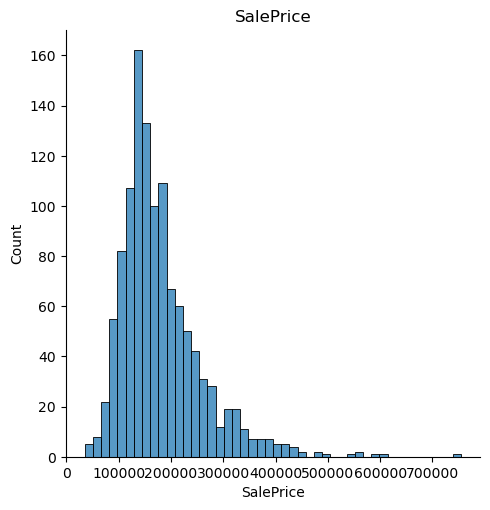

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


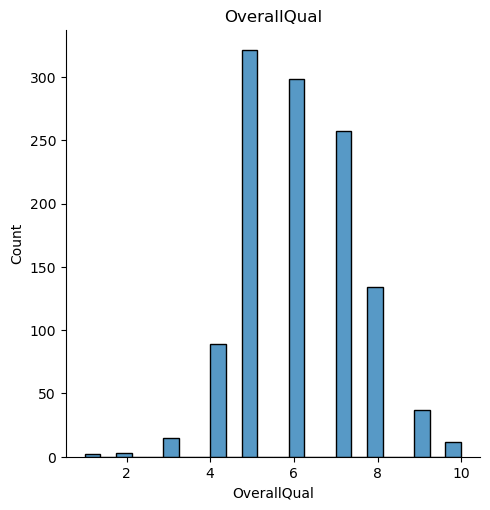

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


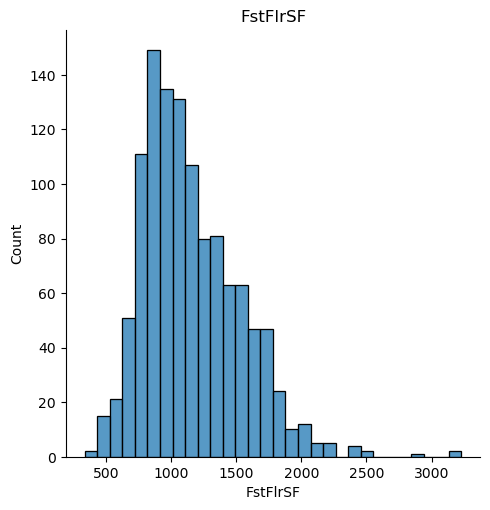

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


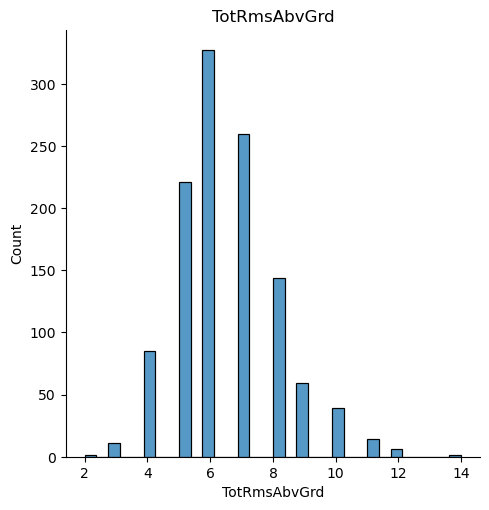

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


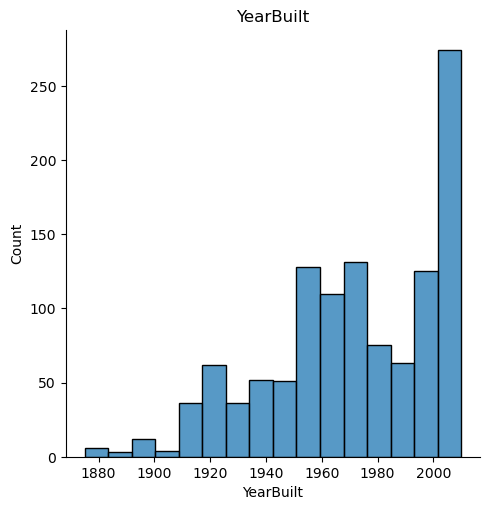

In [53]:
#Histogramas de Variables

gfs = sns.displot(df1['SalePrice'])
gfs.set(title='SalePrice')
plt.show()
print()
gfo = sns.displot(df1['OverallQual'])
gfo.set(title='OverallQual')
plt.show()
print()
gff = sns.displot(df1['FstFlrSF'])
gff.set(title='FstFlrSF')
plt.show()
print()
gft = sns.displot(df1['TotRmsAbvGrd'])
gft.set(title='TotRmsAbvGrd')
plt.show()
print()
gfy = sns.displot(df1['YearBuilt'])
gfy.set(title='YearBuilt')
plt.show()

In [ ]:
#Debido que la variable LotFrontage posee mas de un 10% de valores NaN

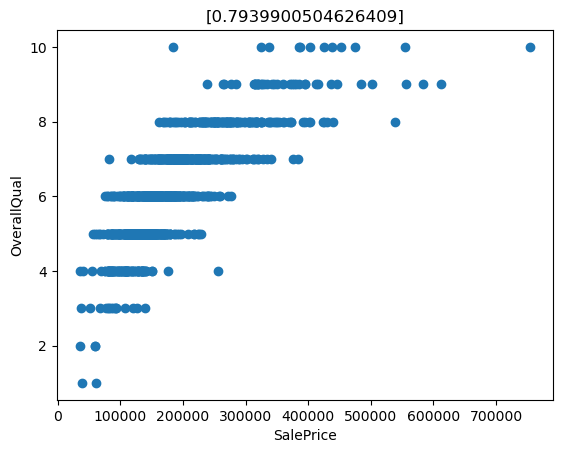

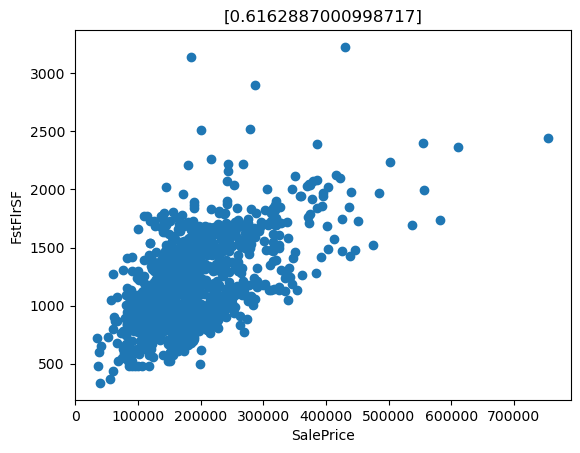

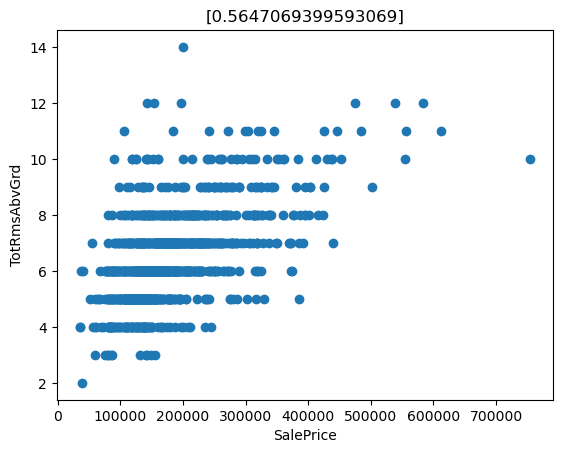

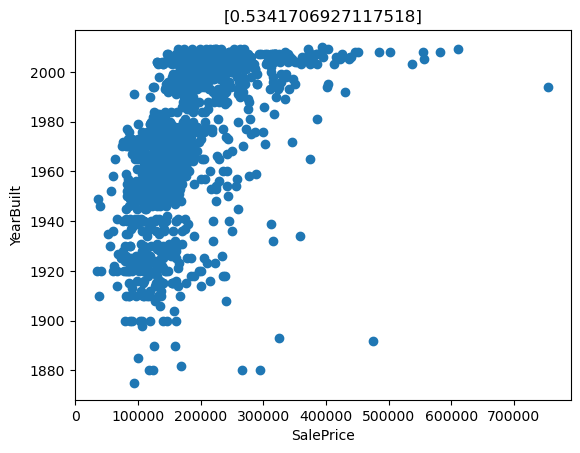

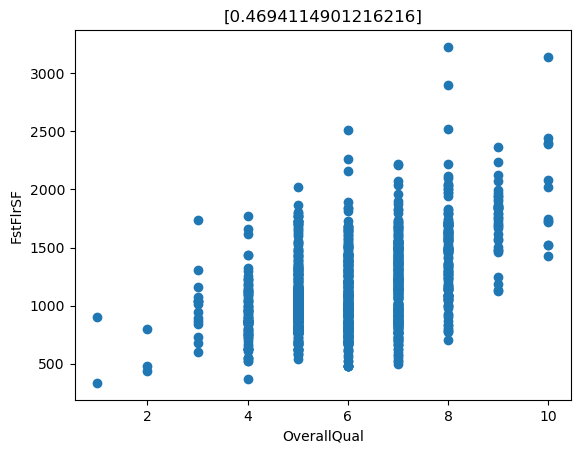

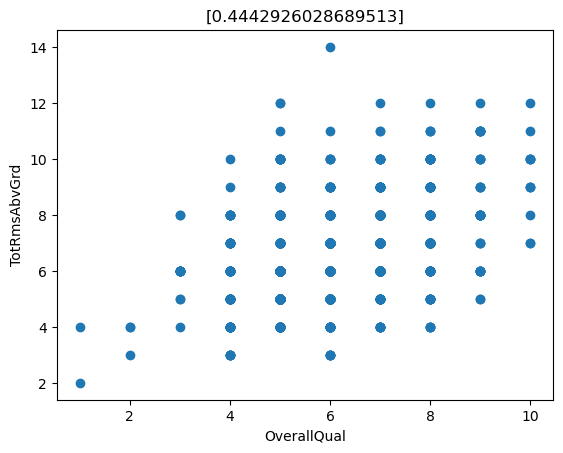

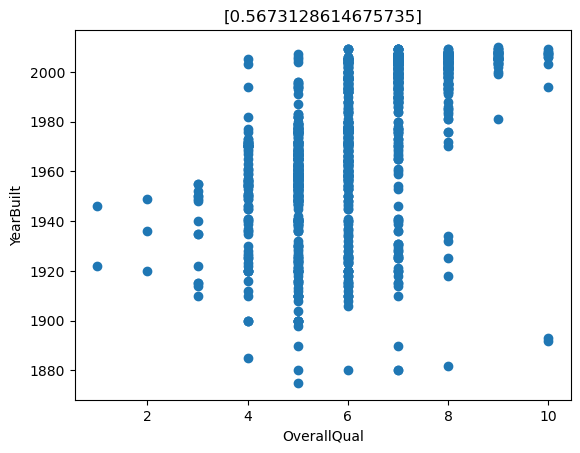

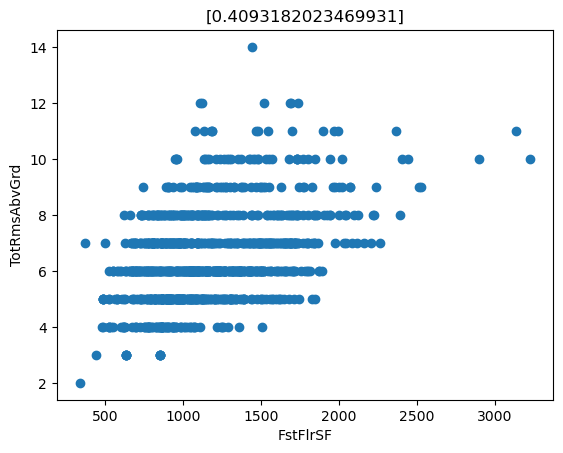

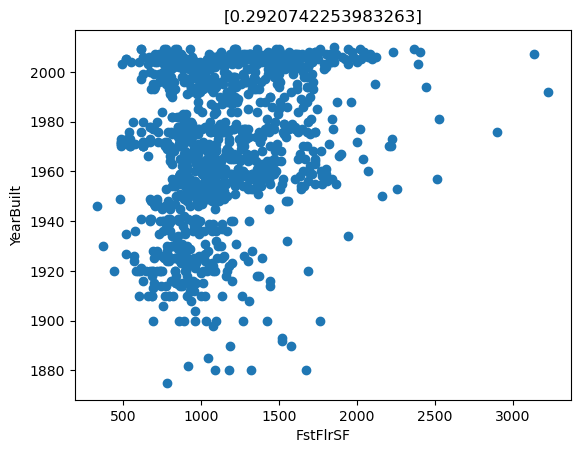

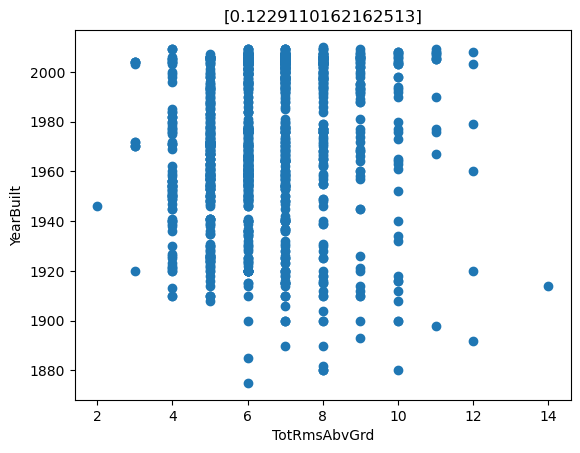

In [54]:
#Correlación

def tr_corr(x, y, x_label, y_label):
    cc = np.corrcoef(x, y)[0, 1]
    plt.scatter(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title([cc])
    plt.show()
    print()

#Correlación para Variables
tr_corr(SalePrice, OverallQual, 'SalePrice', 'OverallQual')
tr_corr(SalePrice, FstFlrSF, 'SalePrice', 'FstFlrSF')
tr_corr(SalePrice, TotRmsAbvGrd, 'SalePrice', 'TotRmsAbvGrd')
tr_corr(SalePrice, YearBuilt, 'SalePrice', 'YearBuilt')
tr_corr(OverallQual, FstFlrSF, 'OverallQual', 'FstFlrSF')
tr_corr(OverallQual, TotRmsAbvGrd, 'OverallQual', 'TotRmsAbvGrd')
tr_corr(OverallQual, YearBuilt, 'OverallQual', 'YearBuilt')
tr_corr(FstFlrSF, TotRmsAbvGrd, 'FstFlrSF', 'TotRmsAbvGrd')
tr_corr(FstFlrSF, YearBuilt, 'FstFlrSF', 'YearBuilt')
tr_corr(TotRmsAbvGrd, YearBuilt, 'TotRmsAbvGrd', 'YearBuilt')